## Building Multi Agent AI Applications with AutoGen and Gemini

<a target="_blank" href="https://colab.research.google.com/github/designingwithml/blogposts/blob/main/notebooks/autogen_introduction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Multi-agent AI apps (a setup where multiple agents powered by GenAI models collaborate autonomously) hold promise in addressing complex tasks. In this notebook, the goal is to delve deep into how we might implement such apps using AutoGen, using the Gemini API

In [25]:
## Install AutoGen
# !pip install -qq pyautogen 

In [1]:
from autogen import AssistantAgent, UserProxyAgent
import os
import dotenv 

# you should create a .env file GOOGLE_API_KEY=YOUR_API_KEY.
dotenv.load_dotenv()

/opt/homebrew/Caskroom/miniconda/base/envs/autog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

## LLM Configuration Specification 

AutoGen agents take an `llm_config` argument that specifies the LLM configuration for an Agent. 
Importantly, AutoGen standardizes on the openai api format for specifying an LLM. This means the openai and azure openai api are supported out of the box. For Azure Open AI models, the `base_url` and `api_version`  and `api_type` fields are required.

- model: The name of the model 
- api_key: The API key to use.
- base_url: The base URL of the LLM api 
- api_version:  The version of the LLM api (Azure Open AI only)
- api_type: The type of LLM api (Azure Open AI only)


In [4]:
llm_config = {"config_list": [{
        "model": "gemini-1.0-pro",
        "api_key": os.environ["GOOGLE_API_KEY"],  
        "api_type": "google",
    }],
    "temperature": 0.1,
}

## Stock Price Chart 

The following code demonstrates setting up two agents in AutoGen that collobrate to addres the task: 
"Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png."

In [10]:
user_proxy = UserProxyAgent(
    name = "user_proxy", 
    code_execution_config={"work_dir":  "data/scratch", "use_docker": True},
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    )  
assistant = AssistantAgent(
    name= "assistant", llm_config=llm_config)
user_proxy.initiate_chat(assistant, message="Plot the NVDA and TESLA stock price YTD. Save the result to a file named chart.png.") 

user_proxy (to assistant):

Plot the NVDA and TESLA stock price YTD. Save the result to a file named chart.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

```sh
# filename: get_stock_plot.sh
python3 -c '
import matplotlib.pyplot as plt
import yfinance as yf
plt.figure(figsize=(8, 5))
plt.title("NVDA and TSLA Stock Price YTD")
plt.ylabel("Price in US $")
nvda = yf.Ticker('NVDA')
nvda_hist = nvda.history(start="2023-01-01")
plt.plot(nvda_hist["Close"], label="NVDA")
tesla = yf.Ticker('TSLA')
tesla_hist = tesla.history(start="2023-01-01")
plt.plot(tesla_hist["Close"], label="TSLA")
plt.legend()
plt.grid(linestyle="-.", color="silver")
plt.savefig("chart.png")
'
```

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is sh)...
user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "<s

ChatResult(chat_id=None, chat_history=[{'content': 'Plot the NVDA and TESLA stock price YTD. Save the result to a file named chart.png.', 'role': 'assistant'}, {'content': '```sh\n# filename: get_stock_plot.sh\npython3 -c \'\nimport matplotlib.pyplot as plt\nimport yfinance as yf\nplt.figure(figsize=(8, 5))\nplt.title("NVDA and TSLA Stock Price YTD")\nplt.ylabel("Price in US $")\nnvda = yf.Ticker(\'NVDA\')\nnvda_hist = nvda.history(start="2023-01-01")\nplt.plot(nvda_hist["Close"], label="NVDA")\ntesla = yf.Ticker(\'TSLA\')\ntesla_hist = tesla.history(start="2023-01-01")\nplt.plot(tesla_hist["Close"], label="TSLA")\nplt.legend()\nplt.grid(linestyle="-.", color="silver")\nplt.savefig("chart.png")\n\'\n```', 'role': 'user'}, {'content': 'exitcode: 1 (execution failed)\nCode output: \nTraceback (most recent call last):\n  File "<string>", line 7, in <module>\nNameError: name \'NVDA\' is not defined\n', 'role': 'assistant'}, {'content': '```sh\n# filename: get_stock_plot.sh\npython3 -c \'\n

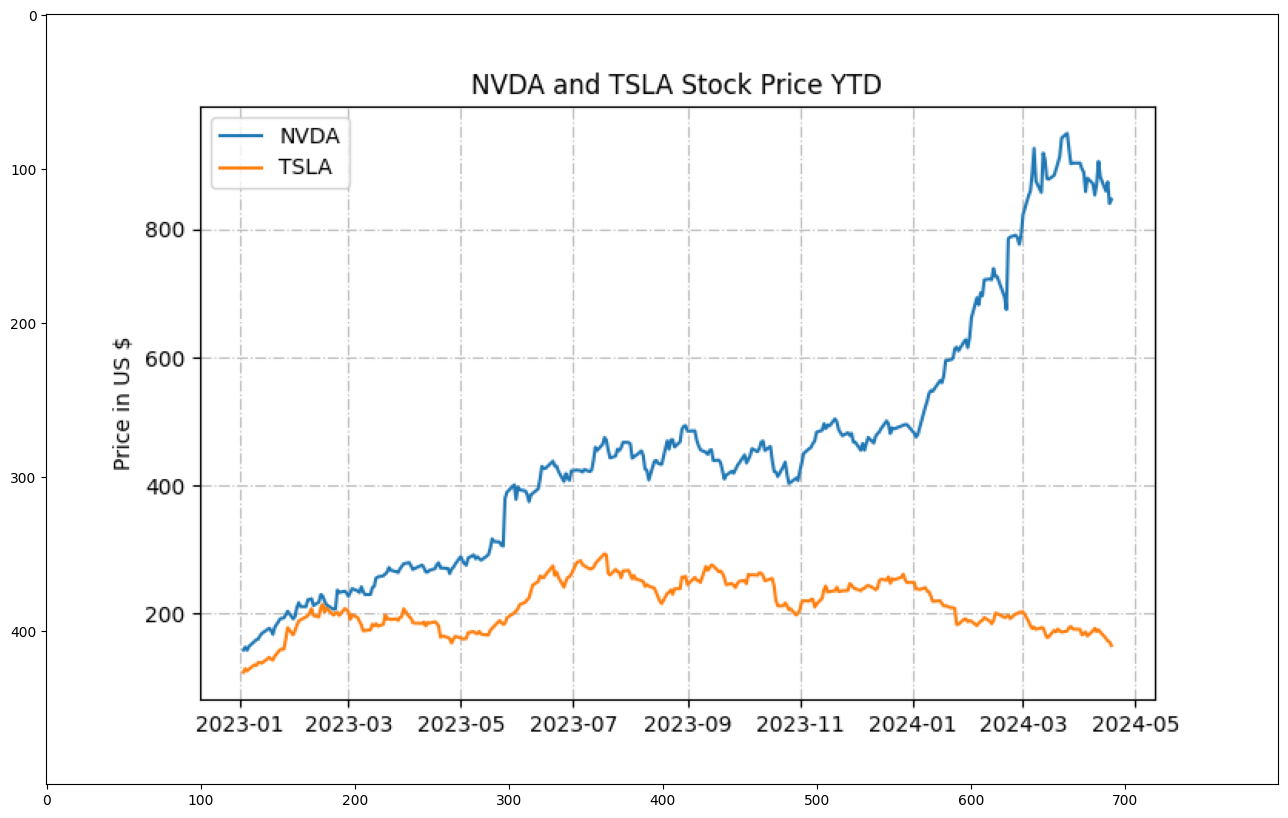

In [11]:
# view the resulting image chart.png
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.imshow(plt.imread("data/scratch/chart.png"));

## How Do I Get Agent Messages?

In [ ]:
user_proxy.chat_messages

defaultdict(list,
            {<autogen.agentchat.assistant_agent.AssistantAgent at 0x2c98cfa30>: [{'content': 'Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.',
               'role': 'assistant'},
              {'content': "To plot a chart of Nvidia (NVDA) and Tesla (TSLA) stock price changes YTD (Year-To-Date), we need to follow these steps:\n\n1. Get the stock price data for NVDA and TSLA for this year.\n2. Extract and calculate the price change YTD for both stocks.\n3. Plot the data using a Python library such as matplotlib.\n4. Save the plot to a file named `chart.png`.\n\nFor step 1, we can use the `yfinance` library to fetch the stock data. If you don't have `yfinance` installed, you'll need to install it using pip (`pip install yfinance`). Then, we can proceed with fetching the data, processing it, and plotting it.\n\nI'll provide you with a complete Python code snippet which accomplishes all these steps. Execute the following 